# Milestone 1

By : Maheswara Sinatriyo

Batch : HCK-001

## Problem Statement

Customer churn

## Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import pickle

from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score, roc_curve

from imblearn.over_sampling import SMOTENC

from tensorflow.keras.models import Sequential, Model, load_model
from tensorflow.keras.layers import Input, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping,ModelCheckpoint

from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder,StandardScaler,MinMaxScaler,OrdinalEncoder
from sklearn.compose import ColumnTransformer
from sklearn.metrics import confusion_matrix ,accuracy_score

import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

np.random.seed(1337)
tf.random.set_seed(1337)


## Data Loading

In [2]:
df = pd.read_csv("cust_churn.csv")
df_original = df.copy()
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


## EDA

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


customer id wont be needed nor usefull in any case, then will be dropped

In [4]:
df.drop(['customerID'],axis=1,inplace=True)

In [5]:
df.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [6]:
df.duplicated().sum()

22

drop duplicates

In [7]:
df.drop_duplicates(inplace=True)

In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
SeniorCitizen,7021.0,0.162512,0.368947,0.00,0.00,0.0,0.0,1.00
tenure,7021.0,32.469449,24.534965,0.00,9.00,29.0,55.0,72.00
MonthlyCharges,7021.0,64.851894,30.069001,18.25,35.75,70.4,89.9,118.75


We can see that SeniorCitizen is actually a categoric features but in numeric, thus we will be changing the type into object (str)

In [9]:
# change type to str
df['SeniorCitizen'] = df['SeniorCitizen'].astype(str)

In [10]:
df.nunique()

gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6531
Churn                  2
dtype: int64

total charges has toomany unique values for a category

In [11]:
df['TotalCharges']

0         29.85
1        1889.5
2        108.15
3       1840.75
4        151.65
         ...   
7038     1990.5
7039     7362.9
7040     346.45
7041      306.6
7042     6844.5
Name: TotalCharges, Length: 7021, dtype: object

we can see that TotalCharges is also a wrong datatype, thus we will be converting it to float

In [12]:
# checking for string types of nulls in TotalCharges
print("N/A : ", df.loc[df['TotalCharges'] == 'N/A'].count().max())
print("- : ", df.loc[df['TotalCharges'] == '-'].count().max())
print("? : ", df.loc[df['TotalCharges'] == '?'].count().max())
print("  : ", df.loc[df['TotalCharges'] == ' '].count().max())

N/A :  0
- :  0
? :  0
  :  11


There are some empty rows in TotalCharges

In [13]:
# change type to numeric
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df['TotalCharges'] = df['TotalCharges'].fillna(value=0)

In [14]:
print("  : ", df.loc[df['TotalCharges'] == ' '].count().max())

  :  0


<AxesSubplot:xlabel='Churn', ylabel='count'>

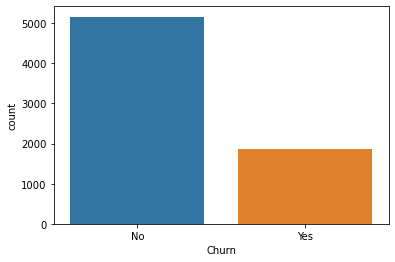

In [15]:
# Check target
sns.countplot(df['Churn'])

The target is imbalanced, we will be balancing later on

In [16]:
# categoric and numeric only for exploration
df_cat = df.select_dtypes(include='object').drop('Churn', axis=1).columns.tolist()
df_num = df.select_dtypes(exclude='object').columns.tolist()

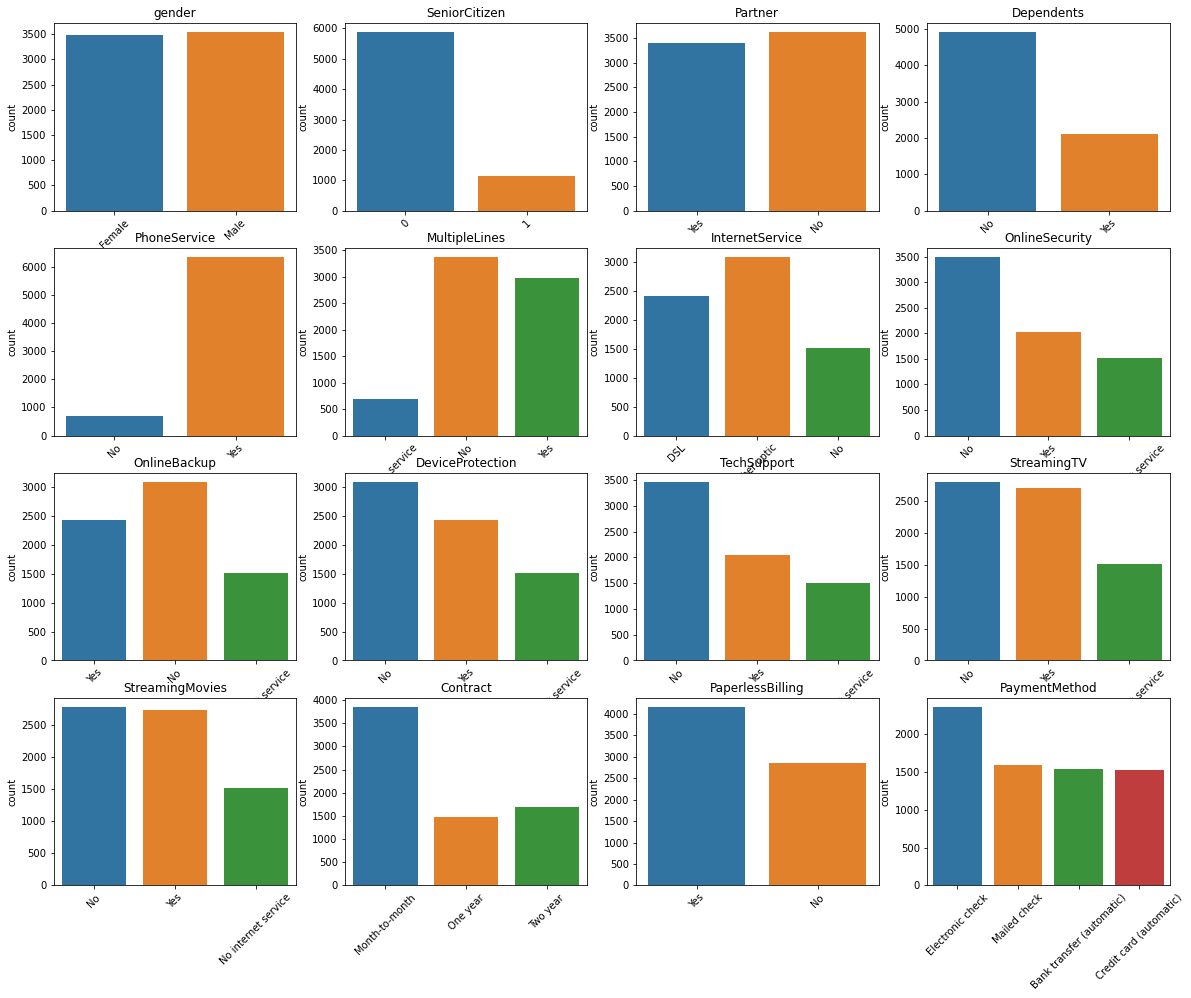

In [17]:
plt.figure(figsize=(20,20))
for i,c in enumerate(df_cat):
    plt.subplot(5,4,i+1)
    sns.countplot(df[c])
    plt.title(c)
    plt.xlabel('')
    plt.xticks(rotation=45)

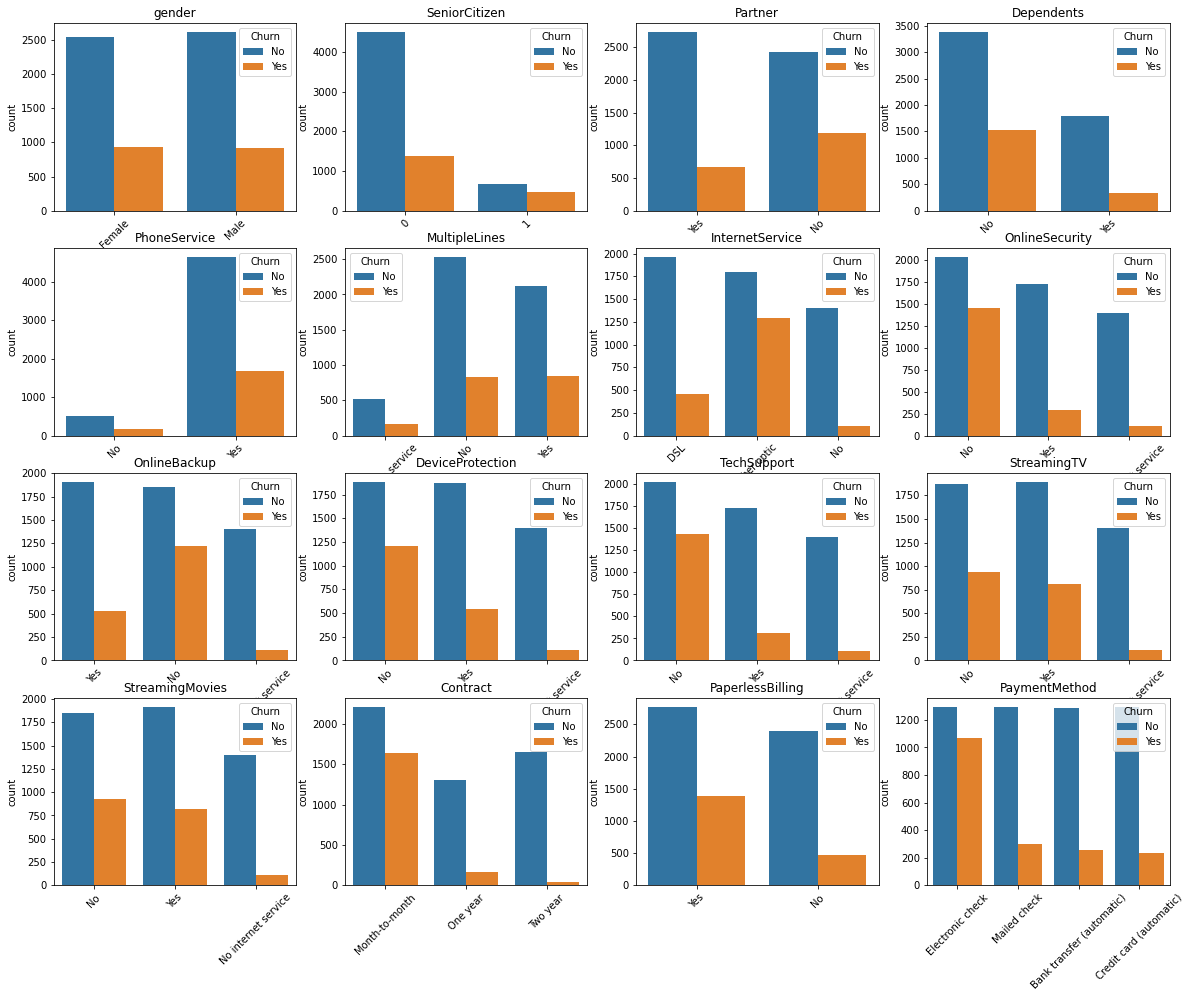

In [18]:
plt.figure(figsize=(20,20))
for i,c in enumerate(df_cat):
    plt.subplot(5,4,i+1)
    sns.countplot(df[c], hue=df['Churn'])
    plt.title(c)
    plt.xlabel('')
    plt.xticks(rotation=45)

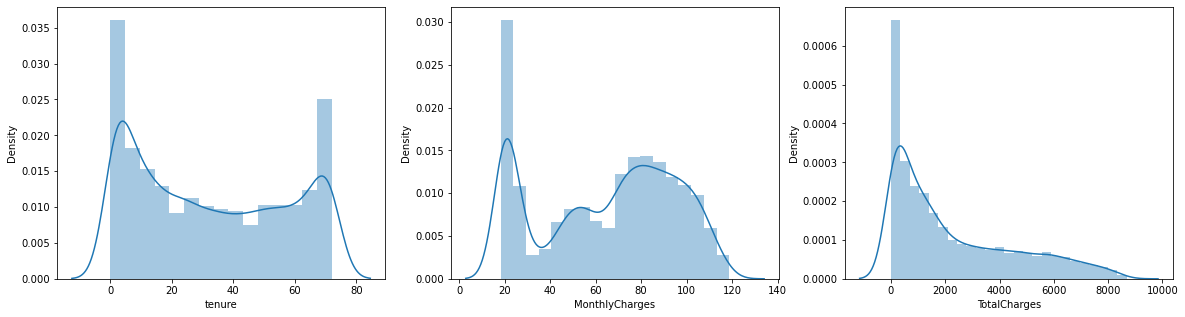

In [19]:
# distributions

plt.figure(figsize=(20,5))

for i,c in enumerate(df_num):

    ax = plt.subplot(1, 3, i+1)
    sns.distplot(df[c],ax=ax)
    plt.xlabel(c)

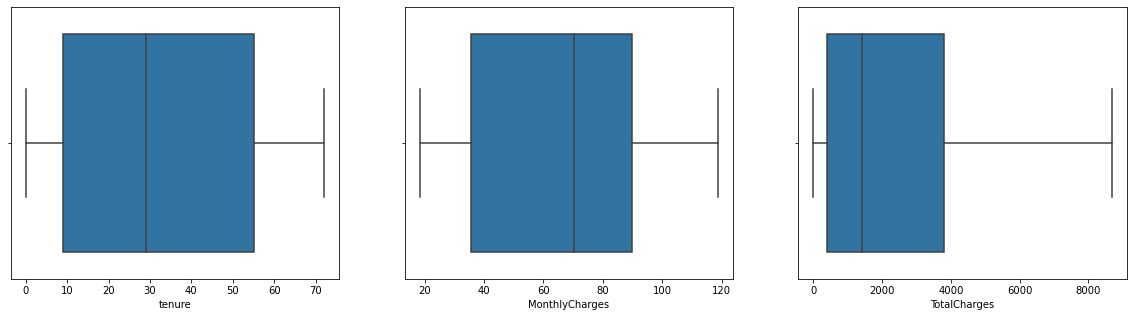

In [20]:
# distributions

plt.figure(figsize=(20,5))

for i,c in enumerate(df_num):

    ax = plt.subplot(1, 3, i+1)
    sns.boxplot(df[c],ax=ax)
    plt.xlabel(c)

In [21]:
for i,c in enumerate(df_num):
    print(f"{c} skewness : ", df[c].skew())

tenure skewness :  0.23554168006988707
MonthlyCharges skewness :  -0.22409728909692606
TotalCharges skewness :  0.9599102654748237


as we can see, only total charges have a skewness, and a mild one.

## Preprocessing

### Train test val split

In [22]:
# X (features), y (target)

X = df.drop('Churn',axis=1)
y = df['Churn']
X

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50
7039,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90
7040,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45
7041,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60


In [23]:
# Train Test Split
X_train_full, X_test, y_train_full, y_test = train_test_split(X, y, test_size=0.25, random_state=1337)

# Reset Index
X_train_full.reset_index(inplace=True,drop=True)
X_test.reset_index(inplace=True,drop=True)
y_train_full.reset_index(inplace=True,drop=True)
y_test.reset_index(inplace=True,drop=True)

# Shape
print('X_Train Size : ', X_train_full.shape)
print('X_Test Size  : ', X_test.shape)
print('y_Train Size : ', y_train_full.shape)
print('y_Test Size  : ', y_test.shape)

X_Train Size :  (5265, 19)
X_Test Size  :  (1756, 19)
y_Train Size :  (5265,)
y_Test Size  :  (1756,)


In [24]:
# Train Test Split
X_train, X_val, y_train, y_val = train_test_split(X_train_full, y_train_full, test_size=0.1, random_state=1337)

# Reset Index
X_train.reset_index(inplace=True,drop=True)
X_val.reset_index(inplace=True,drop=True)
y_train.reset_index(inplace=True,drop=True)
y_val.reset_index(inplace=True,drop=True)

# Shape
print('X_Train Size : ', X_train.shape)
print('X_Test Size  : ', X_val.shape)
print('y_Train Size : ', y_train.shape)
print('y_Test Size  : ', y_val.shape)

X_Train Size :  (4738, 19)
X_Test Size  :  (527, 19)
y_Train Size :  (4738,)
y_Test Size  :  (527,)


### Feature Selection

In [25]:
# dataframe for feature selection
df_feat = pd.concat([X_train,y_train],axis=1)
df_feat

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Male,0,Yes,Yes,47,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Electronic check,40.30,1794.80,No
1,Female,0,No,No,23,Yes,Yes,Fiber optic,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,79.15,1676.95,Yes
2,Female,1,No,No,37,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,76.25,2841.55,Yes
3,Male,0,Yes,No,70,Yes,Yes,Fiber optic,No,Yes,Yes,Yes,No,Yes,Two year,Yes,Bank transfer (automatic),98.70,6858.90,No
4,Female,0,No,No,67,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Mailed check,26.10,1759.55,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4733,Male,0,Yes,No,10,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.30,738.20,Yes
4734,Male,0,Yes,No,19,Yes,Yes,Fiber optic,Yes,Yes,No,Yes,No,No,Month-to-month,Yes,Credit card (automatic),88.80,1672.35,No
4735,Female,0,Yes,Yes,23,Yes,No,Fiber optic,No,No,Yes,No,No,No,Month-to-month,Yes,Credit card (automatic),75.30,1702.90,No
4736,Female,0,No,No,1,Yes,No,DSL,No,No,No,No,No,Yes,Month-to-month,Yes,Electronic check,55.40,55.40,Yes


In [26]:
df_feat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4738 entries, 0 to 4737
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            4738 non-null   object 
 1   SeniorCitizen     4738 non-null   object 
 2   Partner           4738 non-null   object 
 3   Dependents        4738 non-null   object 
 4   tenure            4738 non-null   int64  
 5   PhoneService      4738 non-null   object 
 6   MultipleLines     4738 non-null   object 
 7   InternetService   4738 non-null   object 
 8   OnlineSecurity    4738 non-null   object 
 9   OnlineBackup      4738 non-null   object 
 10  DeviceProtection  4738 non-null   object 
 11  TechSupport       4738 non-null   object 
 12  StreamingTV       4738 non-null   object 
 13  StreamingMovies   4738 non-null   object 
 14  Contract          4738 non-null   object 
 15  PaperlessBilling  4738 non-null   object 
 16  PaymentMethod     4738 non-null   object 


In [27]:
# categoric and numeric only for exploration
cat_feat = df_feat.select_dtypes(include='object').columns.tolist()
num_feat = df_feat.select_dtypes(exclude='object').columns.tolist()

In [28]:
# seperate categoric and numeric
df_cat_feat = df_feat[cat_feat]
df_num_feat = df_feat[num_feat]

In [29]:
# encode for corr heatmap
ordinal_encoder = OrdinalEncoder()

df_cat_feat_enc = ordinal_encoder.fit_transform(df_cat_feat)
df_cat_feat_fin = pd.DataFrame(df_cat_feat_enc, columns=cat_feat)
df_cat_feat_fin

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn
0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,2.0,0.0,2.0,2.0,0.0,0.0,1.0,0.0,2.0,0.0
1,0.0,0.0,0.0,0.0,1.0,2.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,1.0
2,0.0,1.0,0.0,0.0,1.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,1.0
3,1.0,0.0,1.0,0.0,1.0,2.0,1.0,0.0,2.0,2.0,2.0,0.0,2.0,2.0,1.0,0.0,0.0
4,0.0,0.0,0.0,0.0,1.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0,3.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4733,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,1.0
4734,1.0,0.0,1.0,0.0,1.0,2.0,1.0,2.0,2.0,0.0,2.0,0.0,0.0,0.0,1.0,1.0,0.0
4735,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
4736,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,1.0,2.0,1.0


In [30]:
# concat
df_feat_fin = pd.concat([df_cat_feat_fin,df_num_feat],axis=1)
df_feat_fin

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn,tenure,MonthlyCharges,TotalCharges
0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,2.0,0.0,2.0,2.0,0.0,0.0,1.0,0.0,2.0,0.0,47,40.30,1794.80
1,0.0,0.0,0.0,0.0,1.0,2.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,1.0,23,79.15,1676.95
2,0.0,1.0,0.0,0.0,1.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,1.0,37,76.25,2841.55
3,1.0,0.0,1.0,0.0,1.0,2.0,1.0,0.0,2.0,2.0,2.0,0.0,2.0,2.0,1.0,0.0,0.0,70,98.70,6858.90
4,0.0,0.0,0.0,0.0,1.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0,3.0,0.0,67,26.10,1759.55
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4733,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,1.0,10,70.30,738.20
4734,1.0,0.0,1.0,0.0,1.0,2.0,1.0,2.0,2.0,0.0,2.0,0.0,0.0,0.0,1.0,1.0,0.0,19,88.80,1672.35
4735,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,23,75.30,1702.90
4736,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,1.0,2.0,1.0,1,55.40,55.40


<AxesSubplot:>

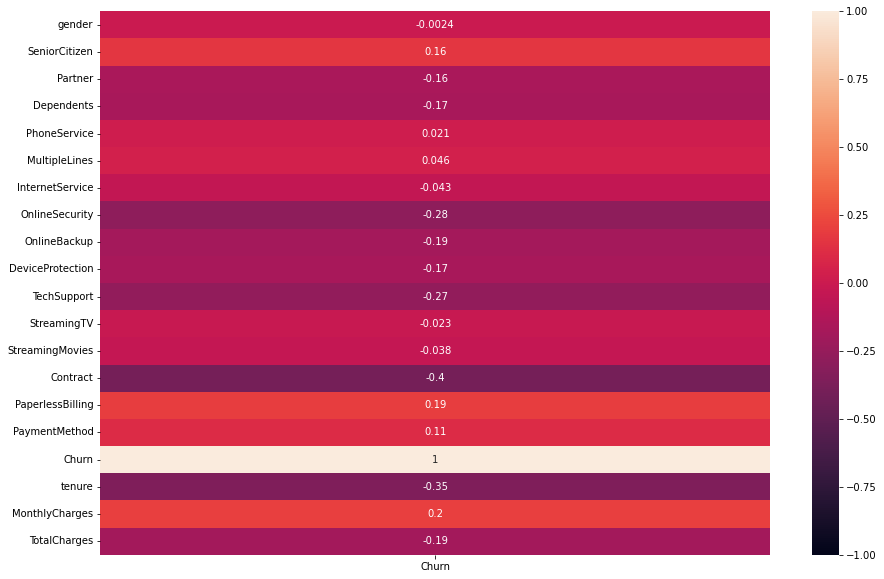

In [31]:
fig, ax = plt.subplots(figsize=(15, 10))

sns.heatmap(df_feat_fin.corr()[['Churn']], ax=ax, annot=True, vmax=1,vmin=-1)

Based on the heatmap we will be using corelation -0.2 and below as well as 0.2 and aboves as our features, which leaves us with: OnlineSecurity, TechSupport, Contract, PaperlessBilling, tenure, and MonthlyCharges as our features.

In [32]:
# dropping unused feature

X_train_feat = X_train[['OnlineSecurity', 'TechSupport', 'Contract', 'PaperlessBilling', 'tenure', 'MonthlyCharges']]
X_test_feat = X_test[['OnlineSecurity', 'TechSupport', 'Contract', 'PaperlessBilling', 'tenure', 'MonthlyCharges']]
X_val_feat = X_val[['OnlineSecurity', 'TechSupport', 'Contract', 'PaperlessBilling', 'tenure', 'MonthlyCharges']]

X_train_feat.reset_index(inplace=True,drop=True)
X_test_feat.reset_index(inplace=True,drop=True)
X_val_feat.reset_index(inplace=True,drop=True)
X_train_feat

,OnlineSecurity,TechSupport,Contract,PaperlessBilling,tenure,MonthlyCharges
0,Yes,Yes,One year,No,47,40.30
1,No,No,Month-to-month,Yes,23,79.15
2,No,No,Month-to-month,Yes,37,76.25
3,No,Yes,Two year,Yes,70,98.70
4,No internet service,No internet service,Two year,Yes,67,26.10
...,...,...,...,...,...,...
4733,No,No,Month-to-month,Yes,10,70.30
4734,Yes,Yes,Month-to-month,Yes,19,88.80
4735,No,No,Month-to-month,Yes,23,75.30
4736,No,No,Month-to-month,Yes,1,55.40


### Categoric and Numeric Split

In [33]:
# categoric and numeric only for exploration
cat_cols = X_train_feat.select_dtypes(include='object').columns.tolist()
num_cols = X_train_feat.select_dtypes(exclude='object').columns.tolist()

In [34]:
X_train_feat_cat = X_train_feat[cat_cols]
X_test_feat_cat = X_test_feat[cat_cols]
X_val_feat_cat = X_val_feat[cat_cols]

X_train_feat_cat

,OnlineSecurity,TechSupport,Contract,PaperlessBilling
0,Yes,Yes,One year,No
1,No,No,Month-to-month,Yes
2,No,No,Month-to-month,Yes
3,No,Yes,Two year,Yes
4,No internet service,No internet service,Two year,Yes
...,...,...,...,...
4733,No,No,Month-to-month,Yes
4734,Yes,Yes,Month-to-month,Yes
4735,No,No,Month-to-month,Yes
4736,No,No,Month-to-month,Yes


In [35]:
X_train_feat_num = X_train_feat[num_cols]
X_test_feat_num = X_test_feat[num_cols]
X_val_feat_num = X_val_feat[num_cols]

X_train_feat_num

,tenure,MonthlyCharges
0,47,40.30
1,23,79.15
2,37,76.25
3,70,98.70
4,67,26.10
...,...,...
4733,10,70.30
4734,19,88.80
4735,23,75.30
4736,1,55.40


### Encoding

In [36]:
# Ordinal encode
ordinal_encoder = OrdinalEncoder()

X_train_encode = ordinal_encoder.fit_transform(X_train_feat_cat)
X_test_encode = ordinal_encoder.transform(X_test_feat_cat)
X_val_encode = ordinal_encoder.transform(X_val_feat_cat)

# To dataframe
X_train_enc = pd.DataFrame(X_train_encode, columns=cat_cols)
X_test_enc = pd.DataFrame(X_test_encode, columns=cat_cols)
X_val_enc = pd.DataFrame(X_val_encode, columns=cat_cols)

X_train_enc

,OnlineSecurity,TechSupport,Contract,PaperlessBilling
0,2.0,2.0,1.0,0.0
1,0.0,0.0,0.0,1.0
2,0.0,0.0,0.0,1.0
3,0.0,2.0,2.0,1.0
4,1.0,1.0,2.0,1.0
...,...,...,...,...
4733,0.0,0.0,0.0,1.0
4734,2.0,2.0,0.0,1.0
4735,0.0,0.0,0.0,1.0
4736,0.0,0.0,0.0,1.0


### Scaling

In [37]:
# standard scaler
scale = StandardScaler()

X_train_scale = scale.fit_transform(X_train_feat_num)
X_test_scale = scale.transform(X_test_feat_num)
X_val_scale = scale.transform(X_val_feat_num)

# To dataframe
X_train_scl = pd.DataFrame(X_train_scale, columns=num_cols)
X_test_scl = pd.DataFrame(X_test_scale, columns=num_cols)
X_val_scl = pd.DataFrame(X_val_scale, columns=num_cols)

X_train_scl

,tenure,MonthlyCharges
0,0.584118,-0.821074
1,-0.394204,0.470187
2,0.176484,0.373800
3,1.521677,1.119973
4,1.399387,-1.293041
...,...,...
4733,-0.924129,0.176039
4734,-0.557258,0.790926
4735,-0.394204,0.342225
4736,-1.291000,-0.319194


### Concat

In [38]:
X_train_fin = pd.concat([X_train_enc,X_train_scl],axis=1)
X_test_fin = pd.concat([X_test_enc,X_test_scl],axis=1)
X_val_fin = pd.concat([X_val_enc,X_val_scl],axis=1)

X_train_fin

,OnlineSecurity,TechSupport,Contract,PaperlessBilling,tenure,MonthlyCharges
0,2.0,2.0,1.0,0.0,0.584118,-0.821074
1,0.0,0.0,0.0,1.0,-0.394204,0.470187
2,0.0,0.0,0.0,1.0,0.176484,0.373800
3,0.0,2.0,2.0,1.0,1.521677,1.119973
4,1.0,1.0,2.0,1.0,1.399387,-1.293041
...,...,...,...,...,...,...
4733,0.0,0.0,0.0,1.0,-0.924129,0.176039
4734,2.0,2.0,0.0,1.0,-0.557258,0.790926
4735,0.0,0.0,0.0,1.0,-0.394204,0.342225
4736,0.0,0.0,0.0,1.0,-1.291000,-0.319194


### Train Balancing

<AxesSubplot:xlabel='Churn', ylabel='count'>

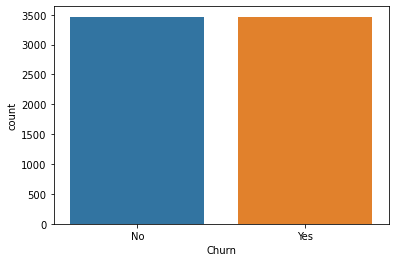

In [39]:
# SMOTENC
smotenc = SMOTENC(random_state = 1337, categorical_features=[0,1,2,3])

X_train_bal, y_train_bal = smotenc.fit_resample(X_train_fin, y_train)

sns.countplot(y_train_bal)

here we use SMOTENC because there is categoric and numeric columns to be balanced

### Target Encoding

In [40]:
label = LabelEncoder()

y_train_fin = label.fit_transform(y_train_bal)
y_test_fin = label.fit_transform(y_test)
y_val_fin = label.fit_transform(y_val)

## Pipeline

### Sequential

In [41]:
# new training set
train_seq = tf.data.Dataset.from_tensor_slices((X_train_bal,y_train_fin))

# shuffle and slice
train_seq = train_seq.shuffle(buffer_size=200).batch(32)

# test set
test_seq = tf.data.Dataset.from_tensor_slices((X_test_fin,y_test_fin))
test_seq = test_seq.batch(32)

### Functional

In [42]:
# new training set
train_func = tf.data.Dataset.from_tensor_slices((X_train_bal,y_train_fin))

# shuffle and slice
train_func = train_func.shuffle(buffer_size=200).batch(32)

# test set
test_func = tf.data.Dataset.from_tensor_slices((X_test_fin,y_test_fin))
test_func = test_func.batch(32)

## Model Definition

In [43]:
alp = 10
inp = X_train_bal.shape[1]
out = 1
hid = int(len(X_train_bal)/(alp*(inp+out)))
print(f'Jumlah Neuron pada Hidden Layer: {hid}')

Jumlah Neuron pada Hidden Layer: 99


### Sequential

In [44]:
model_seq = tf.keras.models.Sequential()
model_seq.add(tf.keras.layers.Dense(inp, activation='relu', kernel_initializer='HeNormal', kernel_regularizer='l2', input_shape=(X_train_bal.shape[1],))) # Input Layer
model_seq.add(tf.keras.layers.Dense(hid, activation='relu')) # Hidden Layer
model_seq.add(tf.keras.layers.Dense(out, activation='sigmoid')) # Output Layer

In [45]:
model_seq.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 6)                 42        
                                                                 
 dense_1 (Dense)             (None, 99)                693       
                                                                 
 dense_2 (Dense)             (None, 1)                 100       
                                                                 
Total params: 835
Trainable params: 835
Non-trainable params: 0
_________________________________________________________________


In [46]:
model_seq.compile(loss='binary_crossentropy', optimizer='adam', metrics='accuracy')

we use adam because adam is the most common optimizer

### Functional

In [47]:
# Define Model's Architecture

def get_uncompiled_model():
    input_func = tf.keras.Input(shape=(inp,), name='input_func')
    input_func = tf.keras.layers.Dense(inp, activation='relu', kernel_initializer='HeNormal', kernel_regularizer='l2')(input_func)
    hidden_func = tf.keras.layers.Dense(hid, activation='relu', name='hidden_layer_func')(input_func)
    output_func = tf.keras.layers.Dense(out, activation='sigmoid', name='output_func')(hidden_func)
    model_func = tf.keras.Model(inputs=input_func, outputs=output_func)
    return model_func

# Define Training Configuration (Optimizer, Loss, Metrics)
def get_compiled_model():
    model_func = get_uncompiled_model()
    model_func.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'],)
    return model_func

## Model Training

### Sequential

In [48]:
history_seq = model_seq.fit(X_train_bal, y_train_fin, epochs=50, batch_size=32, validation_data=(X_val_fin, y_val_fin))

print("\nEvaluate on test data")
result_seq = model_seq.evaluate(test_seq)
print('Test - Loss     : ', result_seq[0])  
print('Test - Accuracy : ', result_seq[1])
print('')

Epoch 1/50
217/217 [==============================] - 1s 1ms/step - loss: 0.6432 - accuracy: 0.7040 - val_loss: 0.6089 - val_accuracy: 0.6660
Epoch 2/50
217/217 [==============================] - 0s 709us/step - loss: 0.5422 - accuracy: 0.7569 - val_loss: 0.5595 - val_accuracy: 0.7021
Epoch 3/50
217/217 [==============================] - 0s 714us/step - loss: 0.5244 - accuracy: 0.7598 - val_loss: 0.5354 - val_accuracy: 0.7116
Epoch 4/50
217/217 [==============================] - 0s 792us/step - loss: 0.5148 - accuracy: 0.7571 - val_loss: 0.5029 - val_accuracy: 0.7192
Epoch 5/50
217/217 [==============================] - 0s 695us/step - loss: 0.5077 - accuracy: 0.7598 - val_loss: 0.4873 - val_accuracy: 0.7324
Epoch 6/50
217/217 [==============================] - 0s 700us/step - loss: 0.5031 - accuracy: 0.7605 - val_loss: 0.5053 - val_accuracy: 0.7211
Epoch 7/50
217/217 [==============================] - 0s 695us/step - loss: 0.4998 - accuracy: 0.7636 - val_loss: 0.5391 - val_accuracy: 0

### Functional

In [49]:
## Call model to be compiled
model_func = get_compiled_model()

## Since the dataset already takes care of batching, we don't pass a `batch_size` argument.
history_func = model_func.fit(train_func, epochs=50, batch_size=32, validation_data=(X_val_fin, y_val_fin))

## Evaluate on a func.
print("\nEvaluate on test data")
result_func = model_func.evaluate(test_func)
print('Test - Loss     : ', result_func[0])
print('Test - Accuracy : ', result_func[1])
print('')

Epoch 1/50
217/217 [==============================] - 1s 1ms/step - loss: 0.4250 - accuracy: 0.8018 - val_loss: 1.6935 - val_accuracy: 0.3624
Epoch 2/50
217/217 [==============================] - 0s 728us/step - loss: 0.5060 - accuracy: 0.7662 - val_loss: 1.1384 - val_accuracy: 0.4649
Epoch 3/50
217/217 [==============================] - 0s 737us/step - loss: 0.4898 - accuracy: 0.7695 - val_loss: 1.0171 - val_accuracy: 0.5161
Epoch 4/50
217/217 [==============================] - 0s 732us/step - loss: 0.4909 - accuracy: 0.7688 - val_loss: 0.9323 - val_accuracy: 0.5503
Epoch 5/50
217/217 [==============================] - 0s 732us/step - loss: 0.4907 - accuracy: 0.7689 - val_loss: 0.8786 - val_accuracy: 0.5655
Epoch 6/50
217/217 [==============================] - 0s 732us/step - loss: 0.4915 - accuracy: 0.7673 - val_loss: 0.8379 - val_accuracy: 0.5882
Epoch 7/50
217/217 [==============================] - 0s 723us/step - loss: 0.4920 - accuracy: 0.7689 - val_loss: 0.8055 - val_accuracy: 0

## Model Evaluation

### Sequential

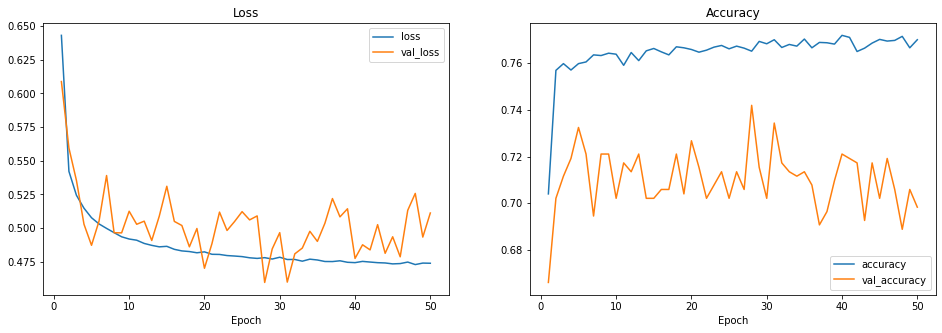

In [50]:
epoch=50

fig, ax = plt.subplots(ncols=2,figsize=(16,5))
ax[0].plot(range(1,epoch+1),history_seq.history['loss'],label='loss')
ax[0].plot(range(1,epoch+1),history_seq.history['val_loss'],label='val_loss')
ax[0].set_title('Loss')
ax[0].legend()
ax[0].set_xlabel('Epoch')

ax[1].plot(range(1,epoch+1),history_seq.history['accuracy'],label='accuracy')
ax[1].plot(range(1,epoch+1),history_seq.history['val_accuracy'],label='val_accuracy')
ax[1].set_title('Accuracy')
ax[1].legend()
ax[1].set_xlabel('Epoch')

plt.show()

exploding

### Functional

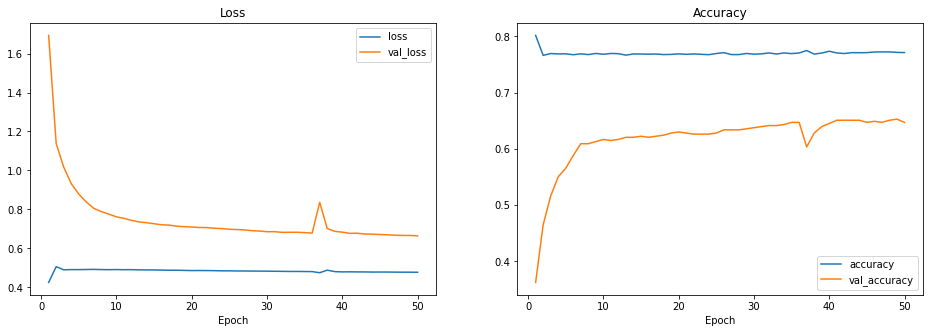

In [51]:
epoch=50

fig, ax = plt.subplots(ncols=2,figsize=(16,5))
ax[0].plot(range(1,epoch+1),history_func.history['loss'],label='loss')
ax[0].plot(range(1,epoch+1),history_func.history['val_loss'],label='val_loss')
ax[0].set_title('Loss')
ax[0].legend()
ax[0].set_xlabel('Epoch')

ax[1].plot(range(1,epoch+1),history_func.history['accuracy'],label='accuracy')
ax[1].plot(range(1,epoch+1),history_func.history['val_accuracy'],label='val_accuracy')
ax[1].set_title('Accuracy')
ax[1].legend()
ax[1].set_xlabel('Epoch')

plt.show()

## Model Improvement

In [52]:
alp = 12
inp = X_train_bal.shape[1]
out = 1
hid = int(len(X_train_bal)/(alp*(inp+out)))
print(f'Jumlah Neuron pada Hidden Layer: {hid}')

Jumlah Neuron pada Hidden Layer: 82


### Sequential

#### Model Definition

In [53]:
# Model Definition
model_seq2 = tf.keras.models.Sequential()
model_seq2.add(tf.keras.layers.Dense(inp, activation='elu', input_shape=(X_train_bal.shape[1],),kernel_initializer='HeNormal',kernel_regularizer='l2')) #input layer
model_seq2.add(tf.keras.layers.BatchNormalization())
model_seq2.add(tf.keras.layers.Dense(hid, activation='elu')) #hidden layer
model_seq2.add(tf.keras.layers.BatchNormalization())
model_seq2.add(tf.keras.layers.Dropout(0.1))
model_seq2.add(tf.keras.layers.Dense(out, activation='sigmoid')) #output layer

In [54]:
model_seq2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 6)                 42        
                                                                 
 batch_normalization (BatchN  (None, 6)                24        
 ormalization)                                                   
                                                                 
 dense_5 (Dense)             (None, 82)                574       
                                                                 
 batch_normalization_1 (Batc  (None, 82)               328       
 hNormalization)                                                 
                                                                 
 dropout (Dropout)           (None, 82)                0         
                                                                 
 dense_6 (Dense)             (None, 1)                

In [55]:
model_seq2.compile(loss='binary_crossentropy', optimizer=tf.keras.optimizers.Adamax(clipvalue=0.1,learning_rate=0.001), metrics='accuracy')

In [56]:
history_seq2 = model_seq2.fit(X_train_bal, y_train_fin, epochs=100, batch_size=256, validation_data=(X_val_fin, y_val_fin))

print("\nEvaluate on test data")
result_seq2 = model_seq2.evaluate(test_seq)
print('Test - Loss     : ', result_seq2[0])  
print('Test - Accuracy : ', result_seq2[1])
print('')

Epoch 1/100
28/28 [==============================] - 1s 6ms/step - loss: 0.7071 - accuracy: 0.7116 - val_loss: 0.7027 - val_accuracy: 0.7381
Epoch 2/100
28/28 [==============================] - 0s 2ms/step - loss: 0.6676 - accuracy: 0.7333 - val_loss: 0.6670 - val_accuracy: 0.7647
Epoch 3/100
28/28 [==============================] - 0s 2ms/step - loss: 0.6598 - accuracy: 0.7408 - val_loss: 0.6437 - val_accuracy: 0.7666
Epoch 4/100
28/28 [==============================] - 0s 2ms/step - loss: 0.6534 - accuracy: 0.7392 - val_loss: 0.6260 - val_accuracy: 0.7723
Epoch 5/100
28/28 [==============================] - 0s 2ms/step - loss: 0.6477 - accuracy: 0.7418 - val_loss: 0.6134 - val_accuracy: 0.7704
Epoch 6/100
28/28 [==============================] - 0s 2ms/step - loss: 0.6460 - accuracy: 0.7458 - val_loss: 0.6013 - val_accuracy: 0.7666
Epoch 7/100
28/28 [==============================] - 0s 2ms/step - loss: 0.6399 - accuracy: 0.7434 - val_loss: 0.5896 - val_accuracy: 0.7590
Epoch 8/100
2

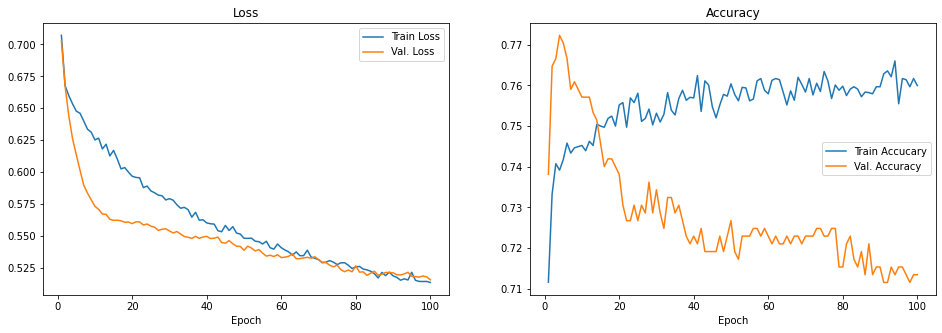

In [57]:
epoch=100

fig, ax = plt.subplots(ncols=2,figsize=(16,5))
ax[0].plot(range(1,epoch+1),history_seq2.history['loss'],label='Train Loss')
ax[0].plot(range(1,epoch+1),history_seq2.history['val_loss'],label='Val. Loss')
ax[0].set_title('Loss')
ax[0].legend()
ax[0].set_xlabel('Epoch')

ax[1].plot(range(1,epoch+1),history_seq2.history['accuracy'],label='Train Accucary')
ax[1].plot(range(1,epoch+1),history_seq2.history['val_accuracy'],label='Val. Accuracy')
ax[1].set_title('Accuracy')
ax[1].legend()
ax[1].set_xlabel('Epoch')

plt.show()

In [58]:
# predict probabilities
y_pred_seq = model_seq2.predict(X_test_fin)
y_pred_seq = (y_pred_seq > 0.5)

# classification report
print("="*10,"TEST","="*10)
print(classification_report(y_test_fin, y_pred_seq, zero_division=0))

55/55 [==============================] - 0s 482us/step
========== TEST ==========
              precision    recall  f1-score   support

           0       0.91      0.72      0.80      1297
           1       0.50      0.79      0.61       459

    accuracy                           0.74      1756
   macro avg       0.70      0.76      0.71      1756
weighted avg       0.80      0.74      0.75      1756



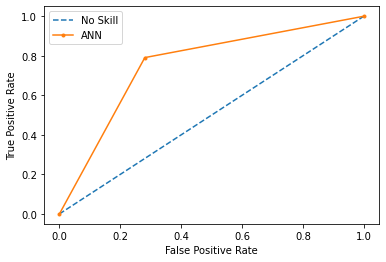

AUC score: 0.7551010123915923


In [59]:
# calculate roc curves & auc
fpr, tpr, thresholds = roc_curve(y_test_fin, y_pred_seq)
auc = roc_auc_score(y_test_fin, y_pred_seq)

# plot the roc curve for the model
plt.plot([0,1], [0,1], linestyle='--', label='No Skill')
plt.plot(fpr, tpr, marker='.', label='ANN')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()
print(f'AUC score: {auc}')

after changing few variables such as batch size to 256, optimizer to adamax, and learning rate to 0.0001, and normalization, we manage to get a non exploding gradient on the sequential API. Although the test accuracy only increase by a slight.

### Functional

In [60]:
# Model Definition

def get_uncompiled_model():
    input_func2 = tf.keras.Input(shape=(inp,), name='input_func2')
    input_func2 = tf.keras.layers.Dense(inp, activation='relu', kernel_initializer='HeNormal', kernel_regularizer='l1')(input_func2)
    input_func2 = tf.keras.layers.BatchNormalization()(input_func2)
    hidden_func2 = tf.keras.layers.Dense(hid, activation='relu', name='hidden_layer_func')(input_func2)
    hidden_func2 = tf.keras.layers.BatchNormalization()(hidden_func2)
    hidden_func2 = layers = tf.keras.layers.Dropout(0.1)(hidden_func2)
    output_func2 = tf.keras.layers.Dense(out, activation='sigmoid', name='output_func')(hidden_func2)
    model_func2 = tf.keras.Model(inputs=input_func2, outputs=output_func2)
    return model_func2


# Define Training Configuration (Optimizer, Loss, Metrics)
def get_compiled_model():
    model_func2 = get_uncompiled_model()
    model_func2.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'],)

    return model_func2


In [61]:
## Call model to be compiled
model_func2 = get_compiled_model()

## Since the dataset already takes care of batching, we don't pass a `batch_size` argument.
history_func2 = model_func2.fit(train_func, epochs=50, batch_size=32, validation_data=(X_val_fin, y_val_fin))

## Evaluate on a func.
print("\nEvaluate on test data")
result_func2 = model_func2.evaluate(test_func)
print('Test - Loss     : ', result_func[0])
print('Test - Accuracy : ', result_func[1])
print('')

Epoch 1/50
217/217 [==============================] - 1s 1ms/step - loss: 0.6536 - accuracy: 0.6316 - val_loss: 0.6859 - val_accuracy: 0.5218
Epoch 2/50
217/217 [==============================] - 0s 889us/step - loss: 0.6545 - accuracy: 0.6324 - val_loss: 0.7662 - val_accuracy: 0.3359
Epoch 3/50
217/217 [==============================] - 0s 872us/step - loss: 0.6485 - accuracy: 0.6456 - val_loss: 0.7679 - val_accuracy: 0.3681
Epoch 4/50
217/217 [==============================] - 0s 868us/step - loss: 0.6374 - accuracy: 0.6584 - val_loss: 0.7558 - val_accuracy: 0.4213
Epoch 5/50
217/217 [==============================] - 0s 876us/step - loss: 0.6343 - accuracy: 0.6594 - val_loss: 0.7577 - val_accuracy: 0.4137
Epoch 6/50
217/217 [==============================] - 0s 876us/step - loss: 0.6307 - accuracy: 0.6636 - val_loss: 0.7394 - val_accuracy: 0.4554
Epoch 7/50
217/217 [==============================] - 0s 880us/step - loss: 0.6292 - accuracy: 0.6645 - val_loss: 0.7392 - val_accuracy: 0

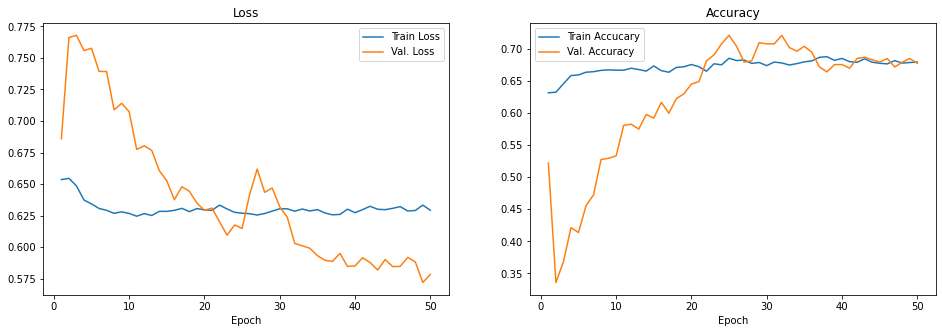

In [62]:
epoch=50

fig, ax = plt.subplots(ncols=2,figsize=(16,5))
ax[0].plot(range(1,epoch+1),history_func2.history['loss'],label='Train Loss')
ax[0].plot(range(1,epoch+1),history_func2.history['val_loss'],label='Val. Loss')
ax[0].set_title('Loss')
ax[0].legend()
ax[0].set_xlabel('Epoch')

ax[1].plot(range(1,epoch+1),history_func2.history['accuracy'],label='Train Accucary')
ax[1].plot(range(1,epoch+1),history_func2.history['val_accuracy'],label='Val. Accuracy')
ax[1].set_title('Accuracy')
ax[1].legend()
ax[1].set_xlabel('Epoch')

plt.show()

In [63]:
# predict probabilities
y_pred_func = model_func2.predict(test_func)
y_pred_func = (y_pred_seq > 0.5)

# classification report
print("="*10,"TEST","="*10)
print(classification_report(y_test_fin, y_pred_func, zero_division=0))

55/55 [==============================] - 0s 500us/step
========== TEST ==========
              precision    recall  f1-score   support

           0       0.91      0.72      0.80      1297
           1       0.50      0.79      0.61       459

    accuracy                           0.74      1756
   macro avg       0.70      0.76      0.71      1756
weighted avg       0.80      0.74      0.75      1756



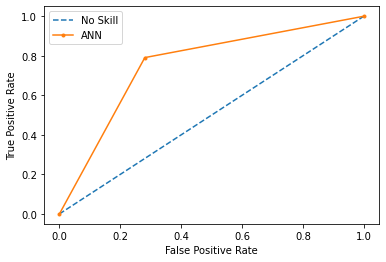

AUC score: 0.7551010123915923


In [64]:
# calculate roc curves & auc
fpr, tpr, thresholds = roc_curve(y_test_fin, y_pred_func)
auc = roc_auc_score(y_test_fin, y_pred_func)

# plot the roc curve for the model
plt.plot([0,1], [0,1], linestyle='--', label='No Skill')
plt.plot(fpr, tpr, marker='.', label='ANN')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()
print(f'AUC score: {auc}')

After changing kernel regularization and normalization, we manage to reduce the effect of vanishing gradient, but now its leaning more into exploding. Overall even though the final model is still not good, there is slight improvement compared to base model.

## Model Saving

In [65]:
model_seq2.save('churn_seq_model.h5')
model_func2.save('churn_func_model.h5')

## Model Inference

In [66]:
cat_cols

['OnlineSecurity', 'TechSupport', 'Contract', 'PaperlessBilling']

In [67]:
num_cols

['tenure', 'MonthlyCharges']

In [68]:
# Create Inference Data
df_inf = pd.DataFrame([['No', 'Yes', 'One year', 'Yes', 20, 5000],
['Yes', 'No internet service', 'Two year', 'No', 60, 5000],
['No', 'No', 'One year', 'Yes', 80, 5000,],
['Yes', 'No', 'Two year', 'No', 40, 5000],
['No internet service', 'Yes', 'Two year', 'Yes', 55, 5000]],

     columns=['OnlineSecurity', 'TechSupport', 'Contract', 'PaperlessBilling', 'tenure', 'MonthlyCharges'])

df_inf

,OnlineSecurity,TechSupport,Contract,PaperlessBilling,tenure,MonthlyCharges
0,No,Yes,One year,Yes,20,5000
1,Yes,No internet service,Two year,No,60,5000
2,No,No,One year,Yes,80,5000
3,Yes,No,Two year,No,40,5000
4,No internet service,Yes,Two year,Yes,55,5000


In [69]:
inf_cat = df_inf[cat_cols]
inf_num = df_inf[num_cols]
inf_cat

,OnlineSecurity,TechSupport,Contract,PaperlessBilling
0,No,Yes,One year,Yes
1,Yes,No internet service,Two year,No
2,No,No,One year,Yes
3,Yes,No,Two year,No
4,No internet service,Yes,Two year,Yes


In [70]:
inf_cat_enc = ordinal_encoder.transform(inf_cat)
inf_cat_df = pd.DataFrame(inf_cat_enc, columns=cat_cols) 
inf_cat_df

,OnlineSecurity,TechSupport,Contract,PaperlessBilling
0,0.0,2.0,1.0,1.0
1,2.0,1.0,2.0,0.0
2,0.0,0.0,1.0,1.0
3,2.0,0.0,2.0,0.0
4,1.0,2.0,2.0,1.0


In [71]:
inf_num_scl = scale.transform(inf_num)
inf_num_df = pd.DataFrame(inf_num_scl, columns=num_cols) 
inf_num_df

,tenure,MonthlyCharges
0,-0.516494,164.024976
1,1.114043,164.024976
2,1.929311,164.024976
3,0.298774,164.024976
4,0.910225,164.024976


In [72]:
# concat
df_inf_fin = pd.concat([inf_num_df,inf_cat_df],axis=1)
df_inf_fin

,tenure,MonthlyCharges,OnlineSecurity,TechSupport,Contract,PaperlessBilling
0,-0.516494,164.024976,0.0,2.0,1.0,1.0
1,1.114043,164.024976,2.0,1.0,2.0,0.0
2,1.929311,164.024976,0.0,0.0,1.0,1.0
3,0.298774,164.024976,2.0,0.0,2.0,0.0
4,0.910225,164.024976,1.0,2.0,2.0,1.0


In [73]:
num_pipe = Pipeline([
    ('scaling', scale)
])

cat_pipe = Pipeline([
    ('encoding', ordinal_encoder)
])


preprocess = ColumnTransformer(transformers=[
    ('num', num_pipe, num_cols),
    ('cat', cat_pipe, cat_cols)
])

preprocess.fit(df_inf_fin)

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('scaling',
                                                  StandardScaler())]),
                                 ['tenure', 'MonthlyCharges']),
                                ('cat',
                                 Pipeline(steps=[('encoding',
                                                  OrdinalEncoder())]),
                                 ['OnlineSecurity', 'TechSupport', 'Contract',
                                  'PaperlessBilling'])])

In [74]:
# saving preprocess pipeline
pickle.dump(preprocess, open('preprocess.pkl', 'wb'))

In [75]:
# df_inf_fin = preprocess.transform(df_inf)

In [76]:
pred_inf = model_func2.predict(df_inf_fin)
pred_inf_df = pd.DataFrame(np.round_(pred_inf), columns=['Predicted Churn'])
pred_inf_df

1/1 [==============================] - 0s 41ms/step


,Predicted Churn
0,1.0
1,1.0
2,1.0
3,1.0
4,1.0


## Conclusion

In conclusion, based on the EDA the data is unbalanced and later balanced using SMOTENC. Most of the columns are categoric, and encoded using oridnal encoder. Since the numerical data has no outliers and only moderately skewed, we use standard scaler.

The model used in this notebook are TensorFlow Sequential API and Functional API. The base sequential API resulted in exploding gradient while the functional API resulted in vanishing gradient. After model improvement the sequential API improved and can be considered a good model, while the functional API does improve, it is still not good enough
